## <div align="center" style="font-style:italic"> Deteksi Anomali Pupuk Tanah menggunakan Density-Based Spatial Clustering of Applications with Noise </div>
 <h2>Anggota :</h2>
 <ol>
    <li>Farrel Dinarta / 00000055702</li>
    <li>Prudence Tendy / 00000060765</li>
    <li>Christsen Alston Angello / 00000053444</li>
 </ol>

## Sumber Dataset :
1. https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction
2. https://www.kaggle.com/datasets/srprojects/fertilizer-prediction
3. https://www.kaggle.com/datasets/sanamps/crop-prediction

### Import Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline

### Import Datasets

In [175]:
# https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction
dataset_1 = pd.read_csv("Fertilizer Prediction.csv")
print(dataset_1.info())
print(dataset_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62    

In [176]:
# https://www.kaggle.com/datasets/srprojects/fertilizer-prediction
dataset_2 = pd.read_csv("Fertilizer Prediction 2.csv")
print(dataset_2.info())
print(dataset_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB
None
   Temperature  Humidity  Rainfall    pH    N    P    K        Soil     Crop  \
0        24.87     82.84    295.61  6.59  4.0  2.0  2.5      Clayey     rice   
1        28.69     96.65    178.96  6.08  4.0  4.0  4.0    laterite  Coconut   
2        20.27     81.64    270.44  5.01  4.0  4.0  2.0  silty clay     rice   
3        25.0

In [177]:
# https://www.kaggle.com/datasets/sanamps/crop-prediction
dataset_3 = pd.read_csv("Fertilizer Prediction 3.csv")
print(dataset_3.info())
print(dataset_3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


=========================================================================================================
### DATA PREPROCESSING OVERVIEW
 <h3>Feature Selection</h3>
 <ol>
    <li>Nitrogen (ppm)</li>
    <li>Potassium (ppm)</li>
    <li>Phosphorous (ppm)</li>
    <li>Humidity (%)</li>
    <li>Temperature (Celsius)</li>
    <li>Moisture (%)</li>    
    <li>Rainfall (mm)</li>
    <li>pH (0-14)</li>
    <li>Name</li>
 </ol>
 
<h3>Data Cleaning</h3>
<ol>
    <li>Features with incomplete values : </li>
    <table border="1" style="width:70%">
        <tr>
            <th></th>
            <th>Rainfall</th>
            <th>Moisture</th>
            <th>pH</th>
            <th>Name</th>
        </tr>
        <tr>
            <td><b>Dataset 1</b></td>
            <td>Doesn't Exist</td>
            <td>Exists</td>
            <td>Doesn't Exist</td>            
            <td>Exists</td>            
        </tr>
        <tr>
            <td><b>Dataset 2</b></td>
            <td>Exists</td>
            <td>Doesn't Exists</td>
            <td>Exists</td>
            <td>Exists</td>            
        </tr>
        <tr>
            <td><b>Dataset 3</b></td>
            <td>Exists</td>
            <td>Doesn't Exists</td>
            <td>Exists</td>        
            <td>Doesn't Exists</td>            
        </tr>
    </table>
    <li>Since we are merging three datasets and incompleteness on the crucial features seems to be unavoidable, we will predict them using supervised model (Linear Regression)
</ol>
 
<h3>Data Integration</h3>
<ol>
    <li>Integrate the given selected features.</li>
    <li>Remove unneccessary or uncommon features.</li>
    <li>Removed features :</li>
    <ol>
        <li>Crop Type</li>
        <li>Soil Type</li>
    </ol>
</ol>

<h3>Feature Scaling</h3>
 <ol>
    <li>The datasets will be normalized since various units and scale are used.</li>
 </ol>
 
 <h3>Merge Datasets</h3>
 <ol>
    <li>Each preprocessed dataset with synchronized features are merged into one dataset for the DBSCAN modeling.</li>
 </ol>
 
  <h3>Feature Segmentation</h3>
 <ol>
    <li>The dataset will be split again according to fertilizer type.</li>
 </ol>

=========================================================================================================

### PREPROCESSING : FEATURE SELECTION

In [178]:
# Synchronize column names
used_features = ['temperature', 'humidity', 'nitrogen', 'potassium', 'phosphorous', 'ph', 'rainfall', 'moisture', 'name']

### Dataset 1

In [179]:
# rename existing columns
dataset_1 = dataset_1.rename(
    columns = {
        'Temparature' : used_features[0], 
        'Humidity' : used_features[1], 
        'Nitrogen' : used_features[2], 
        'Potassium' : used_features[3],
        'Phosphorous' : used_features[4], 
        'Moisture' : used_features[7], 
        'Fertilizer Name' : used_features[8]
    }
)

dataset_1 = dataset_1[used_features[:5] + [used_features[-1], used_features[-2]]]
X_d1 = dataset_1 # for supervised prediction model

# add inexistent columns
new_feature_dataset_1 = pd.DataFrame(columns=used_features[5:7])
dataset_1 = pd.concat([dataset_1, new_feature_dataset_1], axis=1)
dataset_1.head()

,temperature,humidity,nitrogen,potassium,phosphorous,name,moisture,ph,rainfall
0,26,52,37,0,0,Urea,38,NaN,NaN
1,29,52,12,0,36,DAP,45,NaN,NaN
2,34,65,7,9,30,14-35-14,62,NaN,NaN
3,32,62,22,0,20,28-28,34,NaN,NaN
4,28,54,35,0,0,Urea,46,NaN,NaN


### Dataset 2

In [180]:
# rename existing columns
dataset_2 = dataset_2.rename(
    columns = {
        'Temperature' : used_features[0], 
        'Humidity' : used_features[1], 
        'N' : used_features[2], 
        'K' : used_features[3],
        'P' : used_features[4],
        'Rainfall' : used_features[6], 
        'pH' : used_features[5], 
        'Fertilizer' : used_features[8]
    }
)

dataset_2 = dataset_2[used_features[:7] + [used_features[-1]]]
X_d2 = dataset_2 # for supervised prediction model

# add inexistent columns
new_feature_dataset_2 = pd.DataFrame(columns=[used_features[7]])
dataset_2 = pd.concat([dataset_2, new_feature_dataset_2], axis=1)
dataset_2.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,name,moisture
0,24.87,82.84,4.0,2.5,2.0,6.59,295.61,DAP and MOP,NaN
1,28.69,96.65,4.0,4.0,4.0,6.08,178.96,Good NPK,NaN
2,20.27,81.64,4.0,2.0,4.0,5.01,270.44,MOP,NaN
3,25.07,95.02,2.0,3.5,2.1,5.55,192.90,Urea and DAP,NaN
4,25.04,95.90,2.0,2.1,3.9,6.18,174.80,Urea and MOP,NaN


### Dataset 3

In [181]:
# rename existing columns
dataset_3 = dataset_3.rename(
    columns = {
        'temperature' : used_features[0], 
        'humidity' : used_features[1], 
        'N' : used_features[2], 
        'K' : used_features[3],
        'P' : used_features[4],
        'rainfall' : used_features[6], 
        'ph' : used_features[5]        
    }
)

dataset_3 = dataset_3[used_features[:7]]
X_d3 = dataset_3 # for supervised prediction model

# add inexistent columns
new_feature_dataset_3 = pd.DataFrame(columns=used_features[-2:])
dataset_3 = pd.concat([dataset_3, new_feature_dataset_3], axis=1)
dataset_3.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,moisture,name
0,20.879744,82.002744,90,43,42,6.502985,202.935536,NaN,NaN
1,21.770462,80.319644,85,41,58,7.038096,226.655537,NaN,NaN
2,23.004459,82.320763,60,44,55,7.840207,263.964248,NaN,NaN
3,26.491096,80.158363,74,40,35,6.980401,242.864034,NaN,NaN
4,20.130175,81.604873,78,42,42,7.628473,262.717340,NaN,NaN


### PREPROCESSING : HANDLE FERTILIZER NAME (CATEGORICAL)

- Get all unique fertilizer name

In [182]:
fertilizer_name_d1 = np.unique(np.array(dataset_1['name']))
fertilizer_name_d2 = np.unique(np.array(dataset_2['name']))
unique_names = np.unique(np.concatenate((fertilizer_name_d1, fertilizer_name_d2)))
unique_names

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'DAP and MOP', 'Good NPK', 'MOP', 'Urea', 'Urea and DAP',
       'Urea and MOP'], dtype=object)

- Map fertilizer name into integer

In [183]:
name_int_mapping = {name: idx for idx, name in enumerate(unique_names)}

dataset_1['name'] = dataset_1['name'].map(name_int_mapping)
X_d1['name'] = X_d1['name'].map(name_int_mapping)

dataset_2['name'] = dataset_2['name'].map(name_int_mapping)
X_d2['name'] = X_d2['name'].map(name_int_mapping)

name_int_mapping

{'10-26-26': 0,
 '14-35-14': 1,
 '17-17-17': 2,
 '20-20': 3,
 '28-28': 4,
 'DAP': 5,
 'DAP and MOP': 6,
 'Good NPK': 7,
 'MOP': 8,
 'Urea': 9,
 'Urea and DAP': 10,
 'Urea and MOP': 11}

- Inverse Mapping

In [184]:
inv_name_mapping = {v : k for k, v in name_int_mapping.items()}
print(dataset_1['name'].map(inv_name_mapping))
print(dataset_2['name'].map(inv_name_mapping))

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: name, Length: 99, dtype: object
0       DAP and MOP
1          Good NPK
2               MOP
3      Urea and DAP
4      Urea and MOP
           ...     
195             DAP
196    Urea and MOP
197    Urea and DAP
198             DAP
199    Urea and MOP
Name: name, Length: 200, dtype: object


### PREPROCESSING : IMPUTING MISSING VALUES

- Using Linear Regression model

### Dataset 1

<ol>
    <li>Predict `rainfall` and `ph` using the third dataset.</li>
<ol>

In [185]:
y_d3 = X_d3[['rainfall', 'ph']]
X_d3 = X_d3.drop(columns=["rainfall", 'ph'], axis=1)

model = LinearRegression()
model.fit(X_d3, y_d3)

LinearRegression()

In [186]:
X_train1 = X_d1.drop(columns=['name', 'moisture']) # drop since still null
y_pred = model.predict(X_train1)
y_pred = np.array(y_pred)
y_pred[:20]

array([[ 99.75829925,   6.55667044],
       [ 97.8864112 ,   6.49813442],
       [ 96.67264344,   6.43704995],
       [ 98.48573308,   6.49594142],
       [ 98.77587813,   6.53944674],
       [ 98.12538219,   6.49414472],
       [ 99.13119342,   6.52253485],
       [ 98.33336937,   6.51637562],
       [ 99.26214597,   6.5086667 ],
       [ 98.60445824,   6.47947866],
       [100.23184549,   6.5171966 ],
       [ 96.91868218,   6.45187773],
       [ 99.85515339,   6.56157769],
       [ 98.64997937,   6.49897472],
       [100.4525847 ,   6.52508561],
       [ 97.05506982,   6.45143387],
       [ 98.20808358,   6.51198026],
       [ 99.99558753,   6.54058006],
       [ 98.94292585,   6.54530721],
       [ 99.79316848,   6.50424573]])

- Insert the prediction result into the original dataset

In [187]:
dataset_1["rainfall"] = y_pred[:, 0]
dataset_1["ph"] = y_pred[:, 1]
print(dataset_1.head())

   temperature  humidity  nitrogen  potassium  phosphorous  name  moisture  \
0           26        52        37          0            0     9        38   
1           29        52        12          0           36     5        45   
2           34        65         7          9           30     1        62   
3           32        62        22          0           20     4        34   
4           28        54        35          0            0     9        46   

         ph   rainfall  
0  6.556670  99.758299  
1  6.498134  97.886411  
2  6.437050  96.672643  
3  6.495941  98.485733  
4  6.539447  98.775878  


### Dataset 2

<ol>
    <li>Predict `moisture` using the first dataset.</li>
<ol>

In [188]:
y_d1 = X_d1[['moisture']]
X_d1 = X_d1.drop(columns=["moisture"], axis=1)

model = LinearRegression()
model.fit(X_d1, y_d1)

LinearRegression()

In [189]:
X_train2 = dataset_2.drop(columns=['moisture','rainfall', 'ph'])
y_pred = model.predict(X_train2)
y_pred = np.array(y_pred)
y_pred[:20]

array([[49.298019  ],
       [50.50733584],
       [48.24737486],
       [51.97891544],
       [52.35040979],
       [49.50388677],
       [52.67843072],
       [49.34846375],
       [52.35221925],
       [50.03096399],
       [50.52611291],
       [48.44605335],
       [50.09911703],
       [48.85280726],
       [52.43774611],
       [51.96589632],
       [48.49335531],
       [52.72046466],
       [53.58900448],
       [54.0322498 ]])

- Insert the prediction result into the original dataset

In [190]:
dataset_2["moisture"] = y_pred[:, 0]
print(dataset_2.head())

   temperature  humidity  nitrogen  potassium  phosphorous    ph  rainfall  \
0        24.87     82.84       4.0        2.5          2.0  6.59    295.61   
1        28.69     96.65       4.0        4.0          4.0  6.08    178.96   
2        20.27     81.64       4.0        2.0          4.0  5.01    270.44   
3        25.07     95.02       2.0        3.5          2.1  5.55    192.90   
4        25.04     95.90       2.0        2.1          3.9  6.18    174.80   

   name   moisture  
0     6  49.298019  
1     7  50.507336  
2     8  48.247375  
3    10  51.978915  
4    11  52.350410  


### Dataset 3

<ol>
    <li>Predict `name` using the first and second dataset.</li>
<ol>

In [191]:
# merge dataset 1 and 2
dataset_1 = dataset_1.astype(float)
dataset_2 = dataset_2.astype(float)
dataset_3 = dataset_3.astype(float)
merged_dataset = pd.merge(dataset_1, dataset_2, how='outer')

y = merged_dataset[['name']]
X = merged_dataset.drop(columns=["name", 'moisture'], axis=1)

model = LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)
model.fit(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42)

In [192]:
X_train3 = dataset_3.drop(columns=['name','moisture'])

y_pred = model.predict(X_train3)
y_pred = np.array(y_pred)
np.unique(y_pred[:])

array([0., 1., 2., 4., 5., 7., 9.])

- Insert the prediction result into the original dataset

In [193]:
# dataset_3["moisture"] = y_pred[:, 0]
dataset_3["name"] = y_pred[:].round().astype(int)
print(dataset_3.head())

   temperature   humidity  nitrogen  potassium  phosphorous        ph  \
0    20.879744  82.002744      90.0       43.0         42.0  6.502985   
1    21.770462  80.319644      85.0       41.0         58.0  7.038096   
2    23.004459  82.320763      60.0       44.0         55.0  7.840207   
3    26.491096  80.158363      74.0       40.0         35.0  6.980401   
4    20.130175  81.604873      78.0       42.0         42.0  7.628473   

     rainfall  moisture  name  
0  202.935536       NaN     7  
1  226.655537       NaN     7  
2  263.964248       NaN     7  
3  242.864034       NaN     7  
4  262.717340       NaN     7  


- Predict `moisture` using the first and second dataset

In [194]:
y = merged_dataset[['moisture']]
X = merged_dataset.drop(columns=["name", 'moisture'], axis=1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [195]:
X_train3 = dataset_3.drop(columns=['name','moisture'])

y_pred = model.predict(X_train3)
y_pred = np.array(y_pred)
y_pred[:20]

array([[ 1.15723033],
       [ 0.32032286],
       [ 9.09752011],
       [10.64404743],
       [ 5.17549564],
       [10.33055099],
       [ 7.64571265],
       [-1.81998815],
       [ 1.5409685 ],
       [ 7.49406294],
       [ 1.29113132],
       [ 1.53535656],
       [ 3.78768788],
       [ 0.05873359],
       [ 1.22393117],
       [12.280505  ],
       [ 4.47808744],
       [ 4.19024198],
       [ 8.57504736],
       [ 5.0349564 ]])

- Insert the prediction result into the original dataset

In [196]:
dataset_3["moisture"] = y_pred[:]
dataset_3.head()

,temperature,humidity,nitrogen,potassium,phosphorous,ph,rainfall,moisture,name
0,20.879744,82.002744,90.0,43.0,42.0,6.502985,202.935536,1.157230,7
1,21.770462,80.319644,85.0,41.0,58.0,7.038096,226.655537,0.320323,7
2,23.004459,82.320763,60.0,44.0,55.0,7.840207,263.964248,9.097520,7
3,26.491096,80.158363,74.0,40.0,35.0,6.980401,242.864034,10.644047,7
4,20.130175,81.604873,78.0,42.0,42.0,7.628473,262.717340,5.175496,7


### PREPROCESSING : MERGE ALL DATASET
- Merge and filter irrelevant values

In [197]:
# merge
merged_dataset["name"] = merged_dataset["name"].round().astype(int)
merged_dataset = pd.merge(merged_dataset, dataset_3, how='outer')

# filter 
merged_dataset = merged_dataset[(merged_dataset["name"] >= 0) | (merged_dataset["moisture"] >= 0)]
print(merged_dataset.shape)

(2499, 9)


### PREPROCESSING : FEATURE SCALING
- Normalise all except "name"

In [198]:
scaler = MinMaxScaler()

name_column = merged_dataset['name']

original_columns = merged_dataset.columns.tolist()
normalized_columns = list(filter(lambda x : x != "name", original_columns))

merged_dataset_scaled = scaler.fit_transform(merged_dataset[normalized_columns])
merged_dataset = pd.DataFrame(merged_dataset_scaled, columns=normalized_columns)

merged_dataset["name"] = name_column

merged_dataset = merged_dataset.dropna(subset=['name'])
      
merged_dataset["name"] = merged_dataset["name"].round().astype(int)

print(merged_dataset.info())
# print(merged_dataset.isna().sum())
# print(np.isinf(merged_dataset).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2499 non-null   float64
 1   humidity     2499 non-null   float64
 2   nitrogen     2499 non-null   float64
 3   potassium    2499 non-null   float64
 4   phosphorous  2499 non-null   float64
 5   moisture     2499 non-null   float64
 6   ph           2499 non-null   float64
 7   rainfall     2499 non-null   float64
 8   name         2499 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 166.1 KB
None


### PREPROCESSING : DATA SEGMENTATION
- Clustering will be done for the most dominant segment count

In [199]:
for key, value in name_int_mapping.items():
    count = len(merged_dataset[merged_dataset["name"] == value])
    print("Found", count, key + "'s Fertilizers with type ID : " + str(value))

Found 1045 10-26-26's Fertilizers with type ID : 0
Found 50 14-35-14's Fertilizers with type ID : 1
Found 150 17-17-17's Fertilizers with type ID : 2
Found 14 20-20's Fertilizers with type ID : 3
Found 92 28-28's Fertilizers with type ID : 4
Found 93 DAP's Fertilizers with type ID : 5
Found 18 DAP and MOP's Fertilizers with type ID : 6
Found 695 Good NPK's Fertilizers with type ID : 7
Found 16 MOP's Fertilizers with type ID : 8
Found 245 Urea's Fertilizers with type ID : 9
Found 39 Urea and DAP's Fertilizers with type ID : 10
Found 42 Urea and MOP's Fertilizers with type ID : 11


- Separate dataset according to its own type

In [200]:
def dataset_filter(type): # type : Integer
    return merged_dataset[merged_dataset["name"] == type]

# access each fertilizer type through its original name not mapped ID
fertilizer_dataset = {key : dataset_filter(value) for key, value in name_int_mapping.items()}

### MODELING : DBSCAN

In [225]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def dbscan_analysis(data, key):
    # min pts = feature + 1
#     eps = estimate_eps(data, k)
#     print(eps)

    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

#     print(distances)
    db = DBSCAN(eps=0.3, min_samples=data.shape[1]+1).fit(data)
    labels = db.fit_predict(data)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=8, cmap='viridis')
    plt.title('DBSCAN (2D PCA Projection) : %s' % key)
    plt.show()    
    
    cluster_details = pd.DataFrame({'Label': labels, 'DataPoint': range(len(labels))})
    cluster_counts = cluster_details.groupby('Label').count()
    
    cluster_data_points = {label: data[labels == label] for label in np.unique(labels)}
    for label, points in cluster_data_points.items():
        print(f"Label {label}: {len(points)} data points")
        avg_values = np.mean(points, axis=0)
        print(f"Averages for Label {label}:\n", avg_values)
        
#     cluster_stats = cluster_details.groupby('Label').agg({'DataPoint': 'count'})
#     cluster_stats.columns = ['Count']
#     cluster_stats['Average'] = np.nan

#     print(cluster_details)
#     for label in cluster_stats.index:
#         cluster_data_points = cluster_details[cluster_details['Label'] == label]['DataPoint']
#         cluster_stats.loc[label, 'Average'] = np.mean(cluster_data_points)

#     print("Cluster Statistic:")
#     print(cluster_stats)    
    
    print("Cluster Details:")
    print(cluster_counts)
    
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(data, labels)
        print("Silhouette Score:", silhouette_avg)
    else:
        print("Only one cluster. Silhouette score cannot be computed.")

    
    print("------------------")
#     print(cluster_data_points)
    # positive integer = cluster member, negative = outlier / noise

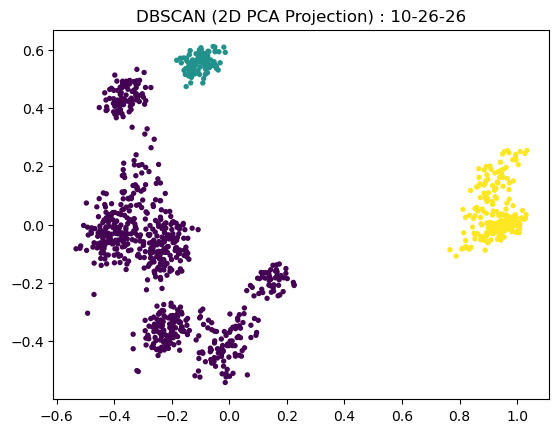

Label 0: 745 data points
Averages for Label 0:
 temperature    0.524430
humidity       0.571813
nitrogen       0.222311
potassium      0.148993
phosphorous    0.356334
moisture       0.628705
ph             0.444797
rainfall       0.239839
name           0.000000
dtype: float64
Label 1: 100 data points
Averages for Label 1:
 temperature    0.288299
humidity       0.030358
nitrogen       0.286357
potassium      0.389854
phosphorous    0.467517
moisture       0.422551
ph             0.595957
rainfall       0.215010
name           0.000000
dtype: float64
Label 2: 200 data points
Averages for Label 2:
 temperature    0.413620
humidity       0.849778
nitrogen       0.157071
potassium      0.975610
phosphorous    0.919828
moisture       0.098901
ph             0.384591
rainfall       0.254796
name           0.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0            745
1            100
2            200
Silhouette Score: 0.3893147216417555
------------------


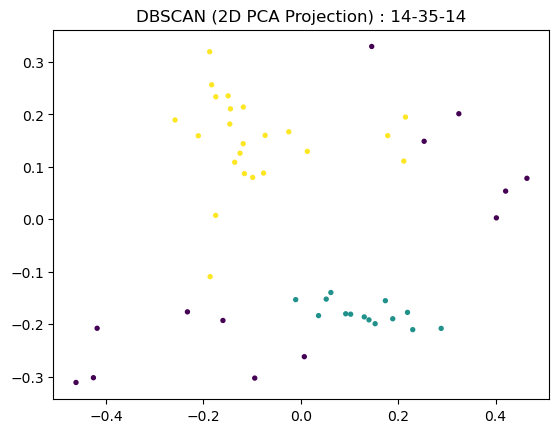

Label -1: 13 data points
Averages for Label -1:
 temperature    0.459888
humidity       0.591114
nitrogen       0.012637
potassium      0.068668
phosphorous    0.314589
moisture       0.764123
ph             0.420293
rainfall       0.347759
name           1.000000
dtype: float64
Label 0: 14 data points
Averages for Label 0:
 temperature    0.646530
humidity       0.546929
nitrogen       0.058673
potassium      0.041812
phosphorous    0.203941
moisture       0.819686
ph             0.459251
rainfall       0.277899
name           1.000000
dtype: float64
Label 1: 23 data points
Averages for Label 1:
 temperature    0.452521
humidity       0.614700
nitrogen       0.037578
potassium      0.083139
phosphorous    0.465067
moisture       0.704302
ph             0.540100
rainfall       0.100785
name           1.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
-1            13
 0            14
 1            23
Silhouette Score: 0.29277764612166157
------------------


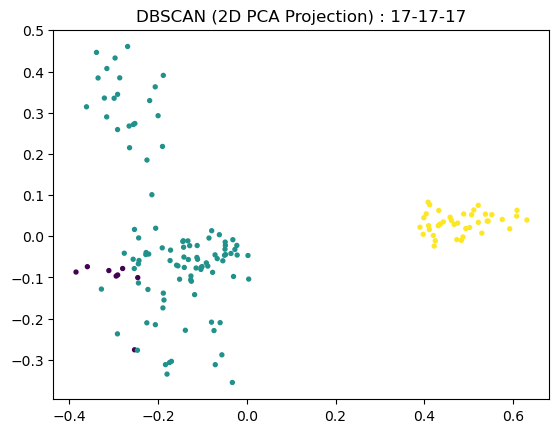

Label -1: 8 data points
Averages for Label -1:
 temperature    0.574987
humidity       0.515675
nitrogen       0.078571
potassium      0.066463
phosphorous    0.121552
moisture       0.827082
ph             0.406733
rainfall       0.247786
name           2.000000
dtype: float64
Label 0: 102 data points
Averages for Label 0:
 temperature    0.501179
humidity       0.785551
nitrogen       0.144328
potassium      0.082114
phosphorous    0.245368
moisture       0.725255
ph             0.522446
rainfall       0.137675
name           2.000000
dtype: float64
Label 1: 40 data points
Averages for Label 1:
 temperature    0.566831
humidity       0.909734
nitrogen       0.664643
potassium      0.235976
phosphorous    0.088966
moisture       0.475418
ph             0.450917
rainfall       0.016202
name           2.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
-1             8
 0           102
 1            40
Silhouette Score: 0.43759859706042326
------------------


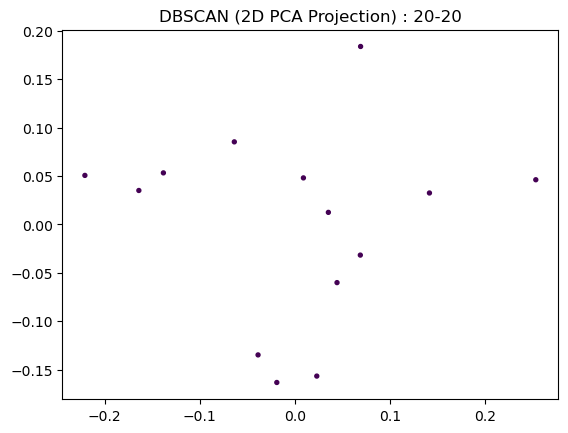

Label 0: 14 data points
Averages for Label 0:
 temperature    0.582992
humidity       0.505267
nitrogen       0.080102
potassium      0.000000
phosphorous    0.079803
moisture       0.820337
ph             0.465629
rainfall       0.281228
name           3.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0             14
Only one cluster. Silhouette score cannot be computed.
------------------


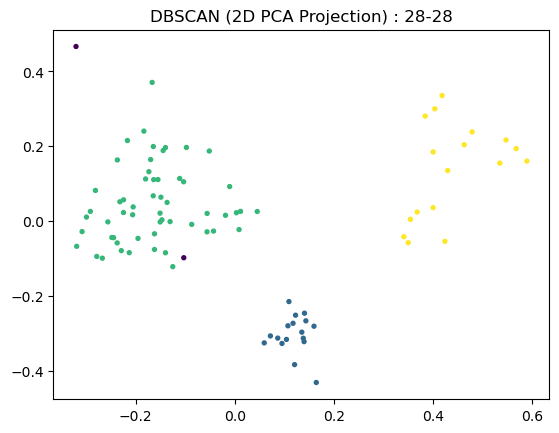

Label -1: 2 data points
Averages for Label -1:
 temperature    0.478708
humidity       0.679465
nitrogen       0.553571
potassium      0.073171
phosphorous    0.386207
moisture       0.507632
ph             0.794201
rainfall       0.162765
name           4.000000
dtype: float64
Label 0: 17 data points
Averages for Label 0:
 temperature    0.594085
humidity       0.511638
nitrogen       0.161765
potassium      0.000000
phosphorous    0.145233
moisture       0.789857
ph             0.467900
rainfall       0.283873
name           4.000000
dtype: float64
Label 1: 56 data points
Averages for Label 1:
 temperature    0.500213
humidity       0.622016
nitrogen       0.358418
potassium      0.078920
phosphorous    0.435099
moisture       0.579591
ph             0.531399
rainfall       0.144536
name           4.000000
dtype: float64
Label 2: 17 data points
Averages for Label 2:
 temperature    0.207762
humidity       0.910701
nitrogen       0.143697
potassium      0.032999
phosphorous    0.12778

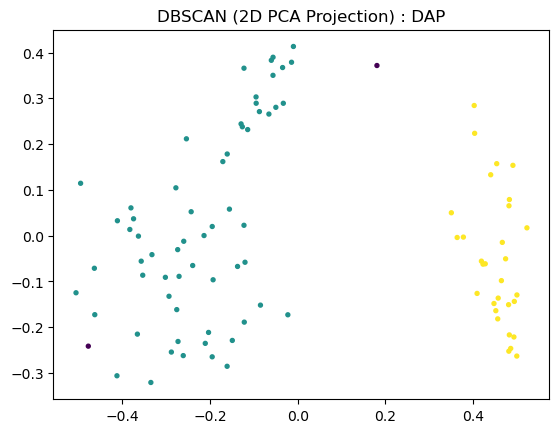

Label -1: 2 data points
Averages for Label -1:
 temperature    0.451933
humidity       0.503188
nitrogen       0.239286
potassium      0.051220
phosphorous    0.324138
moisture       0.668602
ph             0.511182
rainfall       0.383113
name           5.000000
dtype: float64
Label 0: 61 data points
Averages for Label 0:
 temperature    0.576068
humidity       0.434155
nitrogen       0.150000
potassium      0.064054
phosphorous    0.407349
moisture       0.691587
ph             0.390156
rainfall       0.472119
name           5.000000
dtype: float64
Label 1: 30 data points
Averages for Label 1:
 temperature    0.469031
humidity       0.842375
nitrogen       0.029476
potassium      0.015252
phosphorous    0.015103
moisture       0.849617
ph             0.440814
rainfall       0.754777
name           5.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
-1             2
 0            61
 1            30
Silhouette Score: 0.3803161765465688
------------------


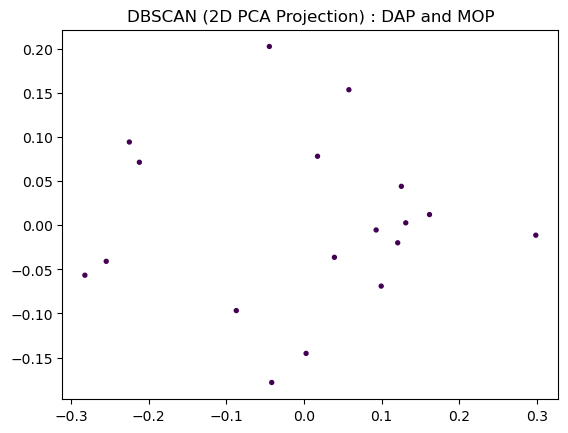

Label 0: 18 data points
Averages for Label 0:
 temperature    0.474286
humidity       0.857382
nitrogen       0.027778
potassium      0.012087
phosphorous    0.014521
moisture       0.856921
ph             0.434092
rainfall       0.703405
name           6.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0             18
Only one cluster. Silhouette score cannot be computed.
------------------


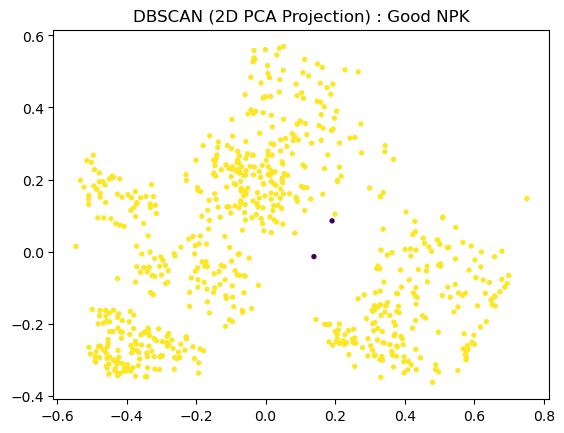

Label -1: 2 data points
Averages for Label -1:
 temperature    0.710392
humidity       0.592615
nitrogen       0.278571
potassium      0.107317
phosphorous    0.413793
moisture       0.629915
ph             0.229856
rainfall       0.451018
name           7.000000
dtype: float64
Label 0: 693 data points
Averages for Label 0:
 temperature    0.491738
humidity       0.819786
nitrogen       0.492620
potassium      0.172791
phosphorous    0.245728
moisture       0.528996
ph             0.453147
rainfall       0.430421
name           7.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
-1             2
 0           693
Silhouette Score: 0.09648312637530618
------------------


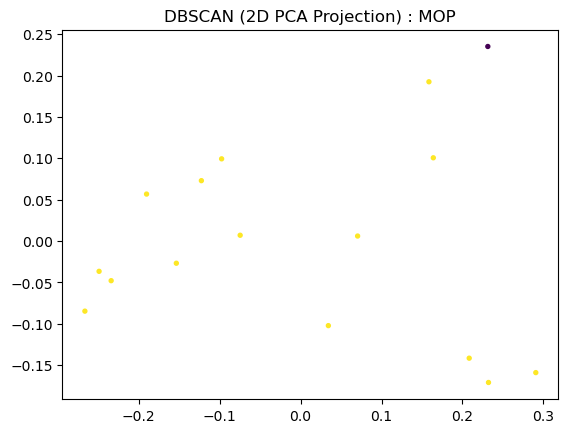

Label -1: 1 data points
Averages for Label -1:
 temperature    0.328390
humidity       0.786035
nitrogen       0.028571
potassium      0.009756
phosphorous    0.027586
moisture       0.847328
ph             0.234085
rainfall       0.898975
name           8.000000
dtype: float64
Label 0: 15 data points
Averages for Label 0:
 temperature    0.483685
humidity       0.873028
nitrogen       0.028571
potassium      0.010081
phosphorous    0.027586
moisture       0.866061
ph             0.445168
rainfall       0.659578
name           8.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
-1             1
 0            15
Silhouette Score: 0.20396743650644752
------------------


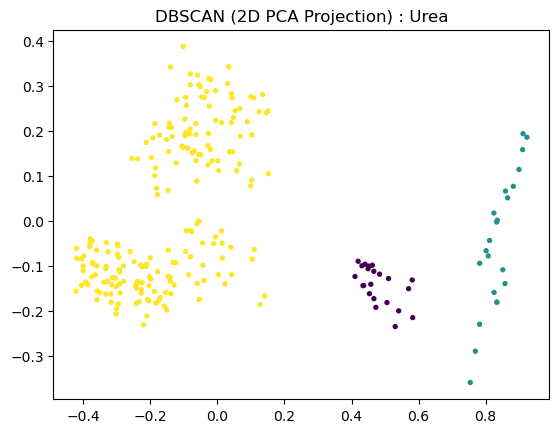

Label 0: 22 data points
Averages for Label 0:
 temperature    0.614109
humidity       0.518750
nitrogen       0.274026
potassium      0.000000
phosphorous    0.000000
moisture       0.789979
ph             0.470526
rainfall       0.281952
name           9.000000
dtype: float64
Label 1: 22 data points
Averages for Label 1:
 temperature    0.451529
humidity       0.851489
nitrogen       0.017143
potassium      0.017029
phosphorous    0.025705
moisture       0.873110
ph             0.440352
rainfall       0.720463
name           9.000000
dtype: float64
Label 2: 201 data points
Averages for Label 2:
 temperature    0.445404
humidity       0.624795
nitrogen       0.766915
potassium      0.114695
phosphorous    0.260422
moisture       0.425901
ph             0.505559
rainfall       0.342764
name           9.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0             22
1             22
2            201
Silhouette Score: 0.5338435856014125
------------------


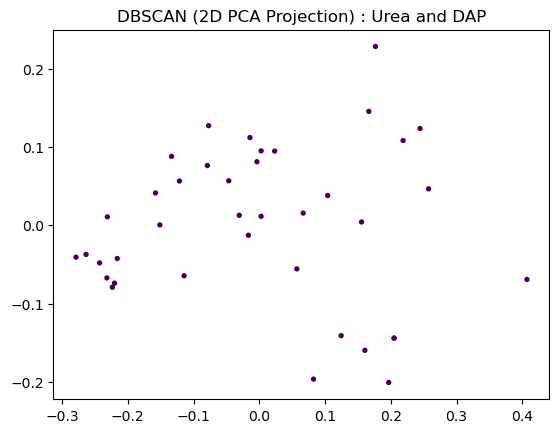

Label 0: 39 data points
Averages for Label 0:
 temperature     0.480250
humidity        0.862695
nitrogen        0.016209
potassium       0.015760
phosphorous     0.014111
moisture        0.885722
ph              0.412407
rainfall        0.658717
name           10.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0             39
Only one cluster. Silhouette score cannot be computed.
------------------


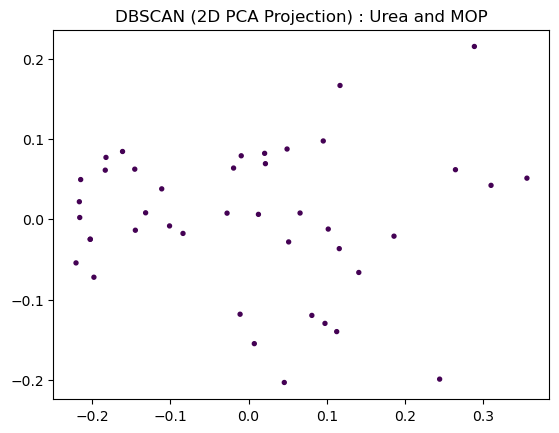

Label 0: 42 data points
Averages for Label 0:
 temperature     0.475033
humidity        0.868568
nitrogen        0.015646
potassium       0.010046
phosphorous     0.027373
moisture        0.888587
ph              0.412222
rainfall        0.638003
name           11.000000
dtype: float64
Cluster Details:
       DataPoint
Label           
0             42
Only one cluster. Silhouette score cannot be computed.
------------------


In [226]:
for key, value in fertilizer_dataset.items():
    dbscan_analysis(data=value, key=key)    

### CONCLUSION
1. Hasil prediksi pada feature pada tahap preprocessing menghasilkan data-data yang dapat dibagi sesuai tiap pupuk, dan hasil model pelatihannya bersifat dominan pada beberapa jenis pupuk saja.
2. Jarang ditemukan noise yang ditemukan pada hasil clustering pada masing-masing tipe pupuk, namun pada dataset yang jumlahnya cukup besar terkadang muncul dua cluster non-outlier. Cluster yang lebih sedikit jumlahnya seharusnya terdeteksi sebagai anomali karena komposisi tiap tipe pupuk seharusnya bersifat konsisten (?)